Explained variance by each component: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522]
Cumulative variance explained: [0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796]

Variable loadings on prinnciple components:
                              PC1       PC2       PC3       PC4       PC5  \
mean radius              0.218902 -0.233857 -0.008531 -0.041409 -0.037786   
mean texture             0.103725 -0.059706  0.064550  0.603050  0.049469   
mean perimeter           0.227537 -0.215181 -0.009314 -0.041983 -0.037375   
mean area                0.220995 -0.231077  0.028700 -0.053434 -0.010331   
mean smoothness          0.142590  0.186113 -0.104292 -0.159383  0.365089   
mean compactness         0.239285  0.151892 -0.074092 -0.031795 -0.011704   
mean concavity           0.258400  0.060165  0.002734 -0.019123 -0.086375   
mean concave points      0.260854 -0.034768 -0.025564 -0.065336  0.043861   
mean symmetry            0.138167  0.190349 -0.040240 -0.

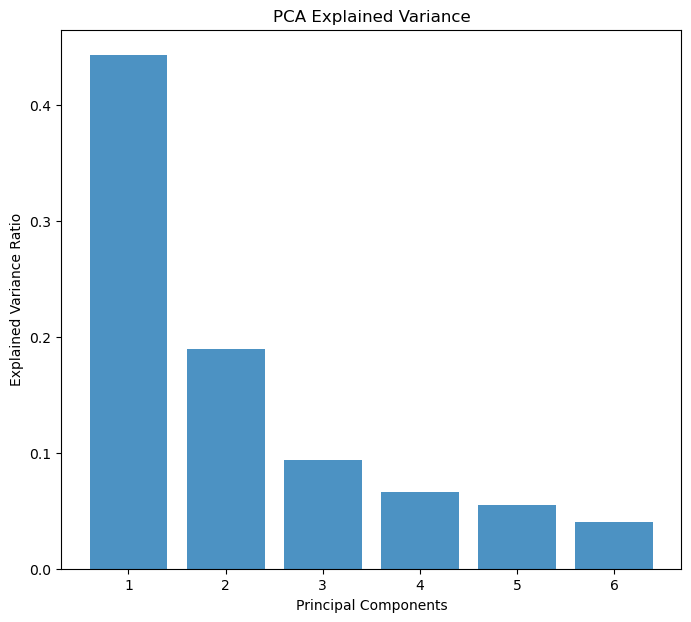

In [3]:
# 1. Principal Component Analysis (PCA) Implementation
# Utilize PCA to demonstrate how essential variables can be acquired from the cancer dataset available from sklearn.datasets

# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pca_utils import save_pca_outputs
from pca_utils import save_figure

# Step 2: Load the dataset
cancer_data = load_breast_cancer()
X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
y = pd.Series(cancer_data.target, name='target')

# Step 3: Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA
pca = PCA(n_components=6)  # Choose number of components to explain most variance
principal_components = pca.fit_transform(X_scaled)

# Step 5: Explain variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)
print("Cumulative variance explained:", np.cumsum(explained_variance))

# Step 6: Identify essential variables (loadings)
loadings = pd.DataFrame(pca.components_.T, index=X.columns,
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print("\nVariable loadings on prinnciple components:")
print(loadings)

save_pca_outputs(
    loadings=loadings,
    explained_variance=pca.explained_variance_ratio_,
    cumulative_variance=pca.explained_variance_ratio_.cumsum()
)       
# Step 7: Optional: Visualize PCA
plt.figure(figsize=(8,7))
plt.bar(range(1,7), explained_variance, alpha=0.8)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('PCA Explained Variance')
fig = plt.gcf()
save_figure(fig, "pca_explained_variance.png")
plt.show()
                        